# Decision Tree Implementation

## Preprocessing

In [1]:
import pandas as pd

# Load the dataset
data_path = 'train_test_network.csv'
df = pd.read_csv(data_path)

# Define features to drop, including IP addresses, ports, and other specified features
features_to_drop = ['src_ip', 'dst_ip', 'src_port', 'service','dst_port', 'ssl_version', 'ssl_cipher', 'ssl_subject', 'ssl_issuer','dns_query','dns_qclass','dns_qtype','dns_rcode','http_request_body_len','http_version', 'http_trans_depth','http_method','http_uri','http_response_body_len','http_status_code','http_user_agent','http_orig_mime_types','http_resp_mime_types','weird_name','weird_addl','weird_notice']
df = df.drop(columns=features_to_drop)

# Exclude 'type' from the list of categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols.remove('type')  # Exclude 'type' column

# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with the mode (excluding 'type')
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode the categorical variables (excluding 'type')
df = pd.get_dummies(df, columns=categorical_cols)

# Now, 'type' is not altered and is ready to be used as the target variable for model training.

# Proceed with scaling the numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Your dataset is now ready for training and testing the model.

# After preprocessing your training data
trained_columns = df.columns.tolist()
trained_columns = list(dict.fromkeys(trained_columns))




In [2]:
def preprocess_df(df, trained_columns):
    # Define features to drop, including IP addresses, ports, and other specified features
    features_to_drop = ['src_ip', 'dst_ip', 'src_port', 'service','dst_port', 'ssl_version', 'ssl_cipher', 'ssl_subject', 'ssl_issuer','dns_query','dns_qclass','dns_qtype','dns_rcode','http_request_body_len','http_version', 'http_trans_depth','http_method','http_uri','http_response_body_len','http_status_code','http_user_agent','http_orig_mime_types','http_resp_mime_types','weird_name','weird_addl','weird_notice']
    df = df.drop(columns=features_to_drop)

    # Exclude 'type' from the list of categorical columns for encoding
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    categorical_cols.remove('type')  # Exclude 'type' column

    # Fill missing numeric values with the median
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # Fill missing categorical values with the mode (excluding 'type')
    df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

    # Encode the categorical variables (excluding 'type')
    df = pd.get_dummies(df, columns=categorical_cols)
    df = df.reindex(columns=trained_columns, fill_value=0)


    # Now, 'type' is not altered and is ready to be used as the target variable for model training.

    # Proceed with scaling the numeric features
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Your dataset is now ready for training and testing the model.

    return df


## Training model

In [3]:
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 168834 rows
Testing set size: 42209 rows


In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy')

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Display a message to confirm training completion
print("Decision Tree model training completed.")


Decision Tree model training completed.


In [5]:
X_test

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,proto_icmp,...,dns_RA_T,dns_rejected_-,dns_rejected_F,dns_rejected_T,ssl_resumed_-,ssl_resumed_F,ssl_resumed_T,ssl_established_-,ssl_established_F,ssl_established_T
149315,-0.013630,-0.015090,-0.014303,-0.006544,-0.050069,-0.017988,0.000463,-0.002286,0.557204,False,...,False,True,False,False,True,False,False,True,False,False
66176,-0.011440,-0.015084,-0.013682,-0.006544,-0.039173,-0.009198,0.027678,0.059325,0.557204,False,...,False,True,False,False,True,False,False,True,False,False
18650,-0.013650,-0.015099,-0.014358,-0.006544,-0.093652,-0.032654,-0.008608,-0.008122,0.557204,False,...,False,True,False,False,True,False,False,True,False,False
199593,-0.013651,-0.015099,-0.014358,-0.006544,-0.093652,-0.032474,-0.011632,-0.008333,0.557204,False,...,False,True,False,False,True,False,False,True,False,False
60358,-0.011940,-0.015085,-0.013682,-0.006544,-0.039173,-0.009960,0.024654,0.059051,0.557204,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83694,-0.004750,-0.015077,-0.014358,-0.006544,-0.006485,0.003046,-0.011632,-0.008333,-1.794675,False,...,False,True,False,False,True,False,False,True,False,False
128370,-0.013249,-0.015099,-0.014358,-0.006544,1.202947,0.180469,-0.011632,-0.008333,-1.794675,False,...,False,True,False,False,True,False,False,True,False,False
196808,-0.002067,-0.014851,-0.014255,-0.006544,-0.028277,0.172307,0.003487,0.002815,0.557204,False,...,False,True,False,False,True,False,False,True,False,False
6096,-0.013650,-0.015099,-0.014358,-0.006544,-0.093652,-0.032654,-0.008608,-0.008122,0.557204,False,...,False,True,False,False,True,False,False,True,False,False


In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model on the test set: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy of the Decision Tree model on the test set: 0.98
Classification Report:
               precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      3919
        ddos       0.98      0.97      0.98      4065
         dos       0.99      0.98      0.99      3934
   injection       0.96      0.97      0.97      3978
        mitm       0.75      0.74      0.74       213
      normal       1.00      1.00      1.00     10021
    password       0.99      0.97      0.98      3968
  ransomware       0.91      0.98      0.95      4047
    scanning       0.99      0.99      0.99      4015
         xss       0.95      0.90      0.92      4049

    accuracy                           0.98     42209
   macro avg       0.95      0.95      0.95     42209
weighted avg       0.98      0.98      0.98     42209



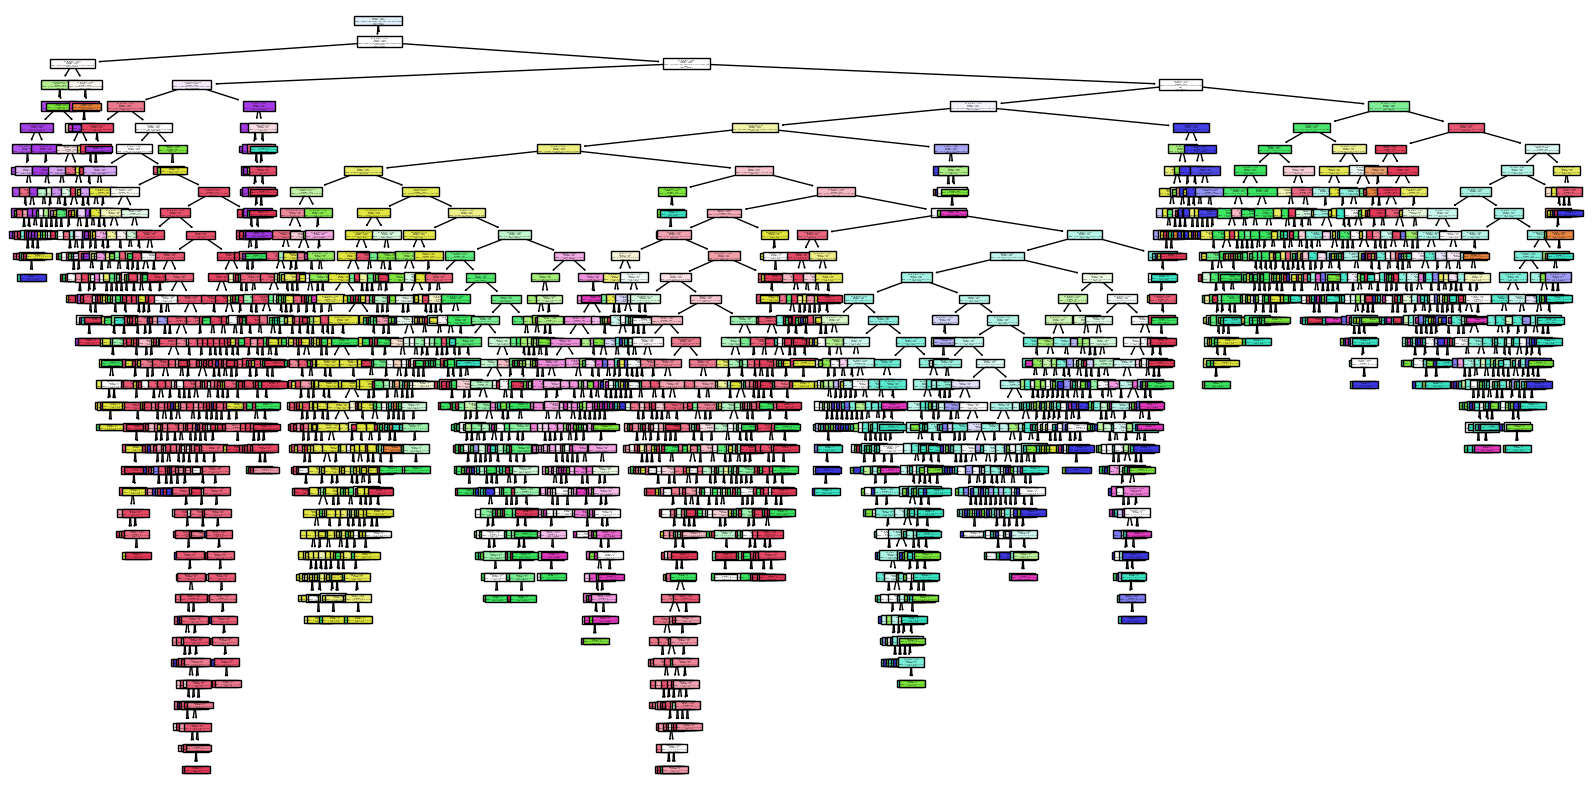

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

In [8]:
testdf = pd.read_csv('train_test_network.csv')
# individualTestdf = extract_rows(testdf, 5, 10)
preprocessed_df = preprocess_df(testdf, trained_columns)

preprocessed_df


,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type,...,dns_RA_T,dns_rejected_-,dns_rejected_F,dns_rejected_T,ssl_resumed_-,ssl_resumed_F,ssl_resumed_T,ssl_established_-,ssl_established_F,ssl_established_T
0,0.501064,-0.009157,-0.014214,-0.006544,1.072197,4.811770,0.082107,0.011817,0.557204,backdoor,...,False,True,False,False,True,False,False,True,False,False
1,-0.013650,-0.015099,-0.014358,-0.006544,-0.093652,-0.032474,-0.008608,-0.008122,0.557204,backdoor,...,False,True,False,False,True,False,False,True,False,False
2,-0.013650,-0.015099,-0.014358,-0.006544,-0.093652,-0.032474,-0.008608,-0.008122,0.557204,backdoor,...,False,True,False,False,True,False,False,True,False,False
3,-0.013650,-0.015099,-0.014358,-0.006544,-0.093652,-0.032654,-0.008608,-0.008122,0.557204,backdoor,...,False,True,False,False,True,False,False,True,False,False
4,-0.013650,-0.015099,-0.014358,-0.006544,-0.093652,-0.032474,-0.008608,-0.008122,0.557204,backdoor,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211038,0.102236,-0.014943,-0.014340,-0.006544,-0.050069,0.096377,0.003487,-0.005230,0.557204,xss,...,False,True,False,False,True,False,False,True,False,False
211039,0.102828,-0.014983,-0.014340,-0.006544,-0.039173,0.068660,0.003487,-0.005230,0.557204,xss,...,False,True,False,False,True,False,False,True,False,False
211040,0.102928,-0.014869,-0.014340,-0.006544,-0.028277,0.157776,0.006511,-0.004957,0.557204,xss,...,False,True,False,False,True,False,False,True,False,False
211041,0.102905,-0.014958,-0.014340,-0.006544,-0.039173,0.087228,0.003487,-0.005230,0.557204,xss,...,False,True,False,False,True,False,False,True,False,False


In [9]:
test_df = preprocessed_df.drop('type', axis=1)

In [10]:
y_test_df = dt_classifier.predict(test_df)

y_test_df[100000]

'normal'

### Testing the model on new data

The following datasets can be found on [processed network dataset](https://unsw-my.sharepoint.com/personal/z5025758_ad_unsw_edu_au/_layouts/15/onedrive.aspx?ga=1&id=/personal/z5025758_ad_unsw_edu_au/Documents/TON_IoT%20datasets/Processed_datasets/Processed_Network_dataset)

Network_dataset_10 contains instances of normal traffic and dos attacks

In [11]:
newdata = pd.read_csv('Network_dataset_10.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

Accuracy of the Decision Tree model on the test set: 0.96


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

        ddos       0.00      0.00      0.00         0
         dos       1.00      0.95      0.98    969998
      normal       1.00      1.00      1.00     30002
    password       0.00      0.00      0.00         0
  ransomware       0.00      0.00      0.00         0
         xss       0.00      0.00      0.00         0

    accuracy                           0.96   1000000
   macro avg       0.33      0.33      0.33   1000000
weighted avg       1.00      0.96      0.98   1000000



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Network_dataset_17 contains instances of normal traffic and ddos attacks

In [12]:
newdata = pd.read_csv('Network_dataset_17.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

Accuracy of the Decision Tree model on the test set: 0.47


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00         0
        ddos       1.00      0.45      0.62    966289
         dos       0.00      0.00      0.00         0
   injection       0.00      0.00      0.00         0
        mitm       0.00      0.00      0.00         0
      normal       1.00      1.00      1.00     33711
    password       0.00      0.00      0.00         0
         xss       0.00      0.00      0.00         0

    accuracy                           0.47   1000000
   macro avg       0.25      0.18      0.20   1000000
weighted avg       1.00      0.47      0.64   1000000



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Network_dataset_2 contains instances of normal traffic and scanning attacks

In [13]:
newdata = pd.read_csv('Network_dataset_2.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

Accuracy of the Decision Tree model on the test set: 0.01


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_cla

Classification Report:
               precision    recall  f1-score   support

        ddos       0.00      0.00      0.00         0
         dos       0.00      0.00      0.00         0
   injection       0.00      0.00      0.00         0
        mitm       0.00      0.00      0.00         0
      normal       1.00      1.00      1.00      5717
    password       0.00      0.00      0.00         0
  ransomware       0.00      0.00      0.00         0
    scanning       0.00      0.00      0.00    994283
         xss       0.00      0.00      0.00         0

    accuracy                           0.01   1000000
   macro avg       0.11      0.11      0.11   1000000
weighted avg       0.01      0.01      0.01   1000000



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Network_dataset_19 contains instances of normal traffic and password breaches

In [14]:
newdata = pd.read_csv('Network_dataset_19.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

Accuracy of the Decision Tree model on the test set: 0.01


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00         0
        ddos       0.00      0.00      0.00         0
         dos       0.00      0.00      0.00         0
   injection       0.00      0.00      0.00         0
        mitm       0.00      0.00      0.00         0
      normal       1.00      1.00      1.00     12708
    password       1.00      0.00      0.00    987292
         xss       0.00      0.00      0.00         0

    accuracy                           0.01   1000000
   macro avg       0.25      0.13      0.13   1000000
weighted avg       1.00      0.01      0.01   1000000



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Network_dataset_22 contains instances of normal traffic and xss attacks

In [15]:
newdata = pd.read_csv('Network_dataset_22.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

/var/folders/qb/3_v2lcx153b073m45ppf7k4c0000gn/T/ipykernel_23433/3761769481.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  newdata = pd.read_csv('Network_dataset_22.csv')


ValueError: cannot reindex on an axis with duplicate labels